# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

In [1]:
import pydot

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [2]:
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data 


#(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data("MNIST_data")

#n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]


mnist_data = input_data.read_data_sets("MNIST_data")

X_raw  = mnist_data.train.images
y_raw  = mnist_data.train.labels


X_raw_test  = mnist_data.test.images
y_raw_test  = mnist_data.test.labels

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

print (n_train, n_test)
X_raw  = X_raw.reshape(n_train,28,28)
X_raw_test  = X_raw_test.reshape(n_test,28,28)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
55000 10000


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

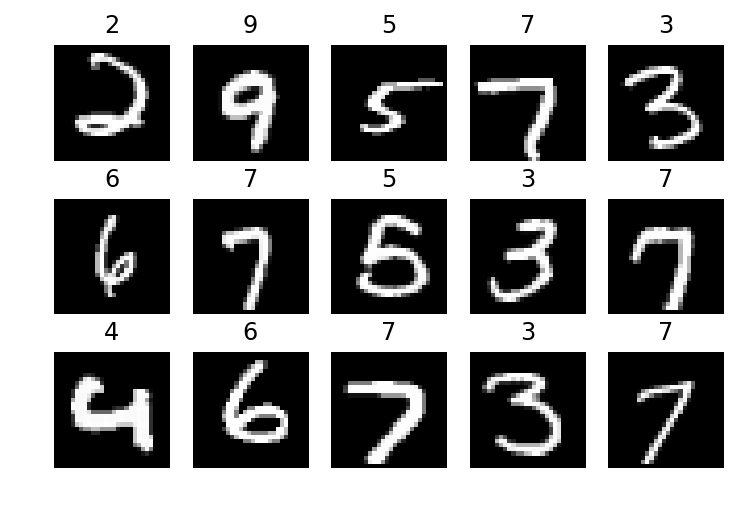

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len,1), dtype=np.float32)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    # 缺少的图片用空白替代
    
    
    for i in range(X_len):
        # 生成当前样本数字个数
        num = random.randint(1,5)            
    
        #抽取的序号
        index = [random.randint(0, X_len-1) for  j in range (num)]
                
        #拼接图片
        temp = np.hstack((X[index[i]] for i in range (num) )).reshape((height, width*num, 1))                  
        
        #把图片赋值到集合中
        X_gen[i,0:height,0:num*width,0] = temp[:,:,0]
        #print (temp.shape)
        
        
        
        #设置y的值
        #print("num:",num)
        for count in range(0,5):
            if count >= num:
                y_gen[count][i][10] =  1
            else:
                y_gen[count][i][y[index[count]]] =  1
            # print ("count:",count,y_gen[count][i])   

    
    return X_gen, y_gen


X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw,y_raw,test_size=0.2,random_state=0)


X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)


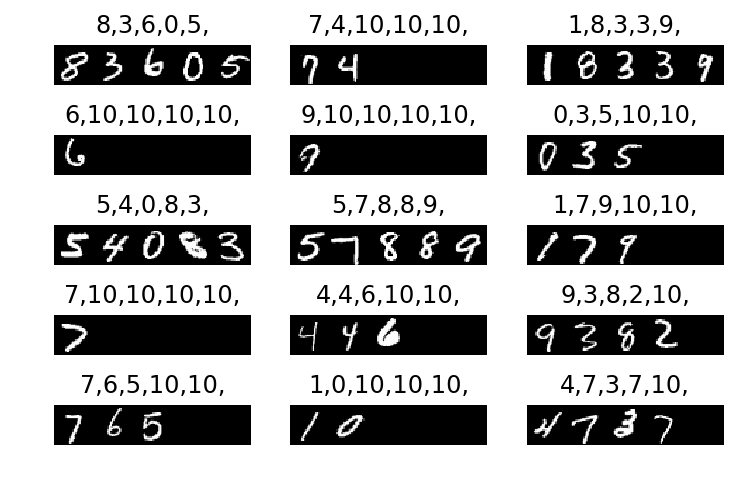

In [5]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**
- 1 使用train_test_split函数，分割出训练集和验证集
- 2 随机取1~5个数字，并拼接成新的图片，缺少的图片用空白替代，空白对应的标志是10

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。
X_raw
在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [函数式模型 API](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [ ]:
y_train1 = np.hstack((y_train[0],y_train[1],y_train[2],y_train[3],y_train[4]))
y_valid1 = np.hstack((y_valid[0],y_valid[1],y_valid[2],y_valid[3],y_valid[4]))
y_test1 = np.hstack((y_test[0],y_test[1],y_test[2],y_test[3],y_test[4]))

print (y_train1.shape)
print (y_train1[0].shape)
print (y_train[0].shape)

In [7]:
from keras.models import Model
from keras.layers import *
from keras.models import save_model,load_model
from keras.models import Sequential
from keras.utils import np_utils
import keras

# TODO: 构建你的模型

pool_size = (2,2)
batch_size = 64

lenet = Sequential()
lenet.add(Conv2D(32, kernel_size=(3,3),  padding='same', strides=(1, 1),
                 input_shape=(28, 140, 1)))  
lenet.add(Activation('relu'))


lenet.add(BatchNormalization(epsilon=1e-6,axis=1))
lenet.add(MaxPool2D(pool_size = pool_size))
lenet.add(Conv2D(32,kernel_size=(3,3) ,padding='same'))
lenet.add(Activation('relu'))

lenet.add(MaxPool2D(pool_size = pool_size))
lenet.add(Dense(128))
lenet.add(Activation('relu'))
lenet.add(Flatten())

lenet.add(Dropout(0.25))
lenet.add(Dense(55))
lenet.add(Activation('softmax'))

adam_lr = 0.0002
adam_beta_1 = 0.5

lenet.compile(loss=keras.losses.categorical_crossentropy,optimizer = keras.optimizers.Adam(lr=adam_lr, beta_1=adam_beta_1),metrics=['accuracy'])     

lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 140, 32)       320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 140, 32)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 140, 32)       112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 70, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 70, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 70, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 35, 32)         0         
__________

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：**
**使用了卷积神经网络.**

我们人看到一幅图像，眨眼之间就知道图像中有什么，图像中的主体在干什么。但计算机不同，计算机看到的每一副图像都是一个数字矩阵。那我们怎么让计算机从一个个数字矩阵中得到有用的信息呢，比如边缘，角点？更甚一点，怎么让计算机理解图像呢？

对图像进行卷积，就是接近目标的第一步。

对图像卷积，就是求卷积核作用在图像后，得到的图像对于该卷积核的累加数值。这些累加的数值可以代表这个图片的一些特征。

如果是针对猫进行识别，人可能知道猫头，猫尾巴等特征。CNN对图片进行处理后，也会学习到一些特征，它可能不知道猫头、猫尾巴这些特征，但也会识别出一些我们可能看不出来的特征，CNN通过这些学习到的特征去做判断。

### 可视化你的网络模型

参考链接：[可视化visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是保存成 PNG 格式显示，也可以直接使用 SVG 格式。 SVG 是矢量图，它的优点是可以无限放大。

In [10]:
import pydot

In [11]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型

# plot_model(lenet, to_file='model.png',show_shapes = True)
# SVG(model_to_dot(lenet).create(prog='dot', format='svg'))


## 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**
使用了(Sequential)序贯模型

### 有22层

- Zeropadding2d_1
- Conv2D1
- Active1
- BatchNormal1
- Maxpooling2d1

- Zeropadding2d2
- Conv2D2
- Active2
- BatchNormal2
- Maxpooling2d2

- Zeropadding2d3
- Conv2D3
- Active3
- BatchNormal3
- Maxpooling2d3

- Dropout1 
- Flatten1
- Dropout2

- Dense1
- Active4

- Dense2
- Active5

大小有：434,258个参数

### 每层的连接情况如上


### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [ ]:
# TODO: 训练你的模型

#lenet = load_model('model.h5')
lenet.fit(X_train,y_train1,batch_size=batch_size,epochs=5,verbose = 1,validation_data = (X_valid,y_valid1))


Train on 44000 samples, validate on 11000 samples
Epoch 1/5
44000/44000 [==============================] - 1920s 44ms/step - loss: 10.1540 - acc: 0.1963 - val_loss: 9.1125 - val_acc: 0.2684
Epoch 2/5
44000/44000 [==============================] - 1892s 43ms/step - loss: 8.9733 - acc: 0.2385 - val_loss: 8.8490 - val_acc: 0.2754
Epoch 3/5
 2432/44000 [>.............................] - ETA: 26:10 - loss: 8.7551 - acc: 0.2442

In [ ]:
lenet.save('model.h5')

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [ ]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    total_right = 0.0
    error = 0
    
    # TODO: 按照错一个就算错的规则计算准确率
    for index in range(y_test[0].shape[0]):
        pred = lenet.predict(X_test[index].reshape(1, height, width*n_len, 1))
        
        right_num = 0
        
        for i in range(5):
            #计算每个片段的预测值
            pred_part= np.argmax(pred[0,i*11:(i+1)*11])
            
            y_test_part = np.argmax(y_test[i][index])

            # 对比片段是否正确
            part_result= (y_test_part == pred_part)
            
            # 计算这个图形正确的数字个数
            right_num = right_num + part_result
        
        #如果5个都正确，则总正确数+1
        if right_num == 5:
            
            total_right =  total_right +1 
            
    #计算准确率        
    acc =  total_right/y_test[0].shape[0]
    return acc


print("accuracy:",evaluate(lenet))

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**

模型的准确率有95.99%，我觉得我的模型足以解决问题

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

In [ ]:
def get_result_pre(result):
    resultstr = ""
    for i in range(n_len):
        pred_part= np.argmax(result[0,i*11:(i+1)*11])
        resultstr += str(pred_part)+  ','
    return resultstr


def get_result_real(result):
    resultstr = ''

    for i in range(n_len):
        
        resultstr =resultstr + str(np.argmax(result[i]))+','
                                    
    return resultstr

index = random.randint(0, n_test-1)
y_pred = lenet.predict(X_test[index].reshape(1, height, width*n_len, 1))

str_test = get_result_real([y_test[x][index] for x in range(n_len)])
                           
str_pre = get_result_pre(y_pred)                          

#print (str_test,str_pre)
                           
plt.title('real: %s\npred:%s'%(str_test, str_pre))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要保存模型，以便下次调用。

读取的方式也很简单：`model = load_model('model.h5')`

In [ ]:
lenet.save('model.h5')